# SYSC4906 Assignment 3

**Group Name: Kukai and Harshan** 

**Student names: 
  Kukai Hamada Beaudry, Harshan Anton**


# Discussion of Solution

1. Which machine learning approach did you use?
  We used the VGG16 convolutional neural network model. We used this approach because it is a neural network that was designed to work with large-scale images for recognition. It was trained on the ImageNet dataset which has over 15 million labeled high-resolution images belonging to roughly 22,000 categories. This is ideal because our purpose is to identify 16 different buildings.

2. How did you split your data between training and testing? 
_(e.g. hold-out test, cross-validation, repeated bootstrap samples, etc)_

  The data was split using scikit-learn’s train_test_split method. We decided to split the data into a training set and a test set with a 20% split on testing images. Since our dataset is quite small (about 3000 pictures) it would make more sense to use cross-validation for training and testing split. However, the issue with cross-validation is that it takes more time than the holdout method. Since we were on a time crunch and testing various different algorithms to find the correct one the holdout method seemed more appropriate.

3. How did you train your classifier?
If you used transfer learning, describe how you did so.

  The classifier was trained by first freezing the base layers of the model, so training does not affect them. Then we compiled the model using categorical_crossentropy as the loss function, accuracy as the performance metric, and rmsprop as the optimizer. Categorical_crossentropy was used as the loss function because it is meant for single label categorization. And in our situation each image can only belong to one class.
 
Also, we used image data generators to augment our dataset to provide more data to work with and to introduce images at various orientations and modifications in the hopes of achieving a more accurate model. Finally, the new CNN is trained using fit_generator and saved as a file.

4. How did you estimate your future performance _(worst recall, best precision, overall accuracy)_?

   **Here are our final predictions (on our validation set):**
  1.	Building with worst recall: ML at 0.5952
  2.	Building with best precision: LB at 1.0
  3. Overall accuracy:	0.79351

5. Discuss the performance of your model. Which buildings did it do the best/worst on and why? What are the strengths and limitations of your method. 

The model we trained did the best on 2 buildings, LB and RO. Visually inspecting the LB photos it becomes apparent that it has a very distinct orange colour unlike the other buildings in the data set. RO on the other hand is in a unique position where the building looks identical on all sides and the flat area surrounding the area forces a similar picture for the data set. This unique colour variation of LB and the lack of variety in RO must of been picked up by the training model for the great results in precession. 

The worst recall and relatively poor precision came from the ML building. Comparing the building with LB and RO, ML has no unique colour, looks completely different on various sides, and is a very large complex allowing for a larger variety in the photo orientation. There is no easy correlation within the ML building photos that can be easily picked up on and much more data would be necessary to train the model to recognise the building on all sides and angles. 

Our method was a result of researching online forms discussing image recognition in a short time frame. One article that caught our attention is [Kaggle #1 Winning Approach for Image Classification Challenge](https://medium.com/neuralspace/kaggle-1-winning-approach-for-image-classification-challenge-9c1188157a86)

The author discusses in detail about how he placed first in a image classification challenge called Kaggle. The method described is to use transfer learning to reduce training time by utilizing pre-existing model weights rather than building them from the ground up. The article is very similar to the one used in Assignment 2 and had the advantage that we were already experienced with its concepts, allowed us to come up with a reasonable model within the given time fame and had many resources online discussing simiar appraoches. 

A limitation in our approach is that we have no pre processing of the data to gage how separable the data is for a better understanding. The medium article referenced earlier shows ways to interpret high dimensional data with [t-Distributed Stochastic Neighbor Embedding](https://lvdmaaten.github.io/tsne/) it would have been helpful to see the data set from a different perspective to choose the approach for tacking the assignment.


6. What would you have done differently if you had more time?

If more time had been allocated for the assignment the first improvement to add would be to run the model on a local machine. The model used here was trained on google colab. Even with GPU acceleration the model took quite a long time to train to be at where it currently is with the best precision of 83% where the browser window was kept open and active overnight with some JavaScript code. There were attempt to run a google colab host on the local machine and execute the note book there but unfortunately our environments could not be configured to import all necessary packages necessary. 

#Required functions to test your method
_These are the five required methods that you must implement._

## prepareModel()
This function should prepare your model for multiple invocations of classifyImage(fname). For example, this function could be used to load a pre-trained model from a URL, where that model is then used by  classifyImage(fname). You should use global variables for any variables initialized by this function.

Runtime of this method is **limited to 5 minutes**, so please don’t retrain your network here. All training should be captured in a pre-trained model to be loaded by this method.


In [0]:
from PIL import Image
from glob import glob
from google.colab import drive
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load model from github
!wget https://github.com/TheColourRed/carleton-u-name-that-building/raw/master/cu_building_classifier.model

# List of building codes to use throughout notebook.
buildingCodes = ('AA', 'CB', 'CT', 'DT', 'FH', 'HP', 'HS', 'LB', 'MC', 'ME', 'ML', 'PA', 'RB', 'RO', 'SA', 'TB')
MODEL_FILE = 'cu_building_classifier.model'

def prepareModel():
  global model # Sample global variable that you may populate here.
  model = load_model(MODEL_FILE)



Using TensorFlow backend.


--2019-12-06 15:42:11--  https://github.com/TheColourRed/carleton-u-name-that-building/raw/master/cu_building_classifier.model
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TheColourRed/carleton-u-name-that-building/master/cu_building_classifier.model [following]
--2019-12-06 15:42:12--  https://raw.githubusercontent.com/TheColourRed/carleton-u-name-that-building/master/cu_building_classifier.model
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58996168 (56M) [application/octet-stream]
Saving to: ‘cu_building_classifier.model’

cu_building_classif 100%[===================>]  56.26M   145MB/s    in

## label = classifyImage(fname)
Accepts a filename (e.g. ‘test/ME/testImage1.jpg’) of a square JPG image with size at least 500x500 pixels.
Returns a 2-character label corresponding to the predicted building (see table of labels above)

Any variables initialized by prepareModel() should be declared as global within this function if you want to access them (e.g. a pre-trained model)


In [0]:
from keras.preprocessing import image as kp_image
from keras.applications.inception_v3 import decode_predictions, preprocess_input

def classifyImage(fname):
  global model # Sample global variable that you may populate in prepareModel and use here.

  WIDTH = 500
  HEIGHT = 500
  labels = ('AA', 'CB', 'CT', 'DT', 'FH', 'HP', 'HS', 'LB', 'MC', 'ME', 'ML', 'PA', 'RB', 'RO', 'SA', 'TB')

  print("Predicting class of '{0:s}' using model '{1:s}'".format(fname,model.name))
  img = kp_image.load_img(fname, target_size=(HEIGHT, WIDTH))
  x = kp_image.img_to_array(img)  # Convert image to nparray
  x = np.expand_dims(x, axis=0)   # Need to pre-pend a dimension to indicate batch number.
  x = preprocess_input(x)         # Normalize image to match how Inceptionv3 expects to receive images
  preds = model.predict(x)        # Use the model to compute prediction score for each possible class
  label = labels[preds.argmax(axis=-1)[0]] # Decodes the predicted class scores to assign a single class label
  return label


## label = worstRecall()
Returns the label of a building that you expect will have to lowest recall, when tested on new images

In [0]:
def worstRecall():
  return buildingCodes[10] #worst recall is ML at 0.5952 agaisnt our validation set


## label = bestPrecision()
Returns the label of a building that you expect will have to highest precision, when tested on new images

In [0]:
def bestPrecision():
  return buildingCodes[7] #best precision is LB at 1.0 agaisnt our validation set


##acc_score = estimatedAccuracy()
Returns the accuracy (between [0.0,1.0]) that you expect to achieve across all test images, assuming that each building is equally represented


In [0]:
# Function to return estimated accuracy that will be obtained across all test images
def estimatedAccuracy():
  return 0.7935103244837758

# Test required functions
_We will replace the text below with our actual test code..._






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


--2019-12-06 15:42:22--  https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment3/Images/SampleImages.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jrgreen7/SYSC4906/raw/master/Assignments/Assignment3/Images/SampleImages.zip [following]
--2019-12-06 15:42:23--  https://github.com/jrgreen7/SYSC4906/raw/master/Assignments/Assignment3/Images/SampleImages.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jrgreen7/SYSC4906/master/Assignments/Assignment3/Images/SampleImages.zip [following]
--2019-12-

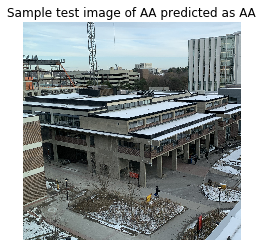

Correct!
Predicting class of 'SampleImages/CB_1.jpg' using model 'model_1'


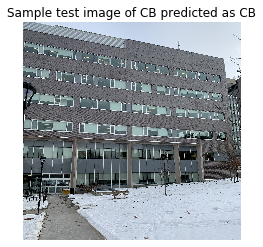

Correct!
Predicting class of 'SampleImages/DT_1.jpg' using model 'model_1'


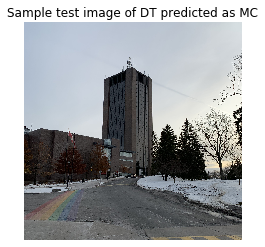

Incorrect...
Predicting class of 'SampleImages/HS_1.jpg' using model 'model_1'


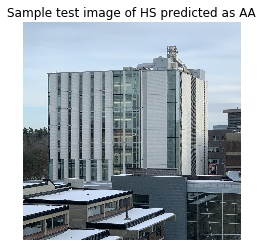

Incorrect...
Expected that worst recall would be on ML
Expected that best precision would be on LB
Expected total accuracy would be 0.794
Actual total accuracy is 0.500


In [0]:
import numpy as np
from PIL import Image, ExifTags
import matplotlib.pyplot as plt
from glob import glob


# First prepare the model:
prepareModel() # Limited to 5 minutes...

# Load (secret) test data into local Colab environment
!wget https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment3/Images/SampleImages.zip?raw=true
!unzip SampleImages.zip?raw=true #Should create 4 images
test_images = sorted(glob('SampleImages/*.jpg'))
actual_labels = (buildingCodes[0],buildingCodes[1],buildingCodes[3],buildingCodes[6])

# Classify sample test images:
TP = 0
for imgFname,actual_label in (zip(test_images,actual_labels)):
  pred_label = classifyImage(imgFname) # Predict the label of this image file

  # Plot the image with actual and predicted labels
  # Note that we may have to rotate the image, depending on the 
  # orientation of the camera. Use EXIF tags for this:
  im = Image.open(imgFname)
  for orientation in ExifTags.TAGS.keys() : 
    if ExifTags.TAGS[orientation]=='Orientation' : break 
  exif=dict(im._getexif().items())

  if exif[orientation] == 3 : 
    im=im.rotate(180, expand=True)
  elif exif[orientation] == 6 : 
    im=im.rotate(270, expand=True)
  elif exif[orientation] == 8 : 
    im=im.rotate(90, expand=True)

  im = im.convert('RGB') # May not be necessary?

  plt.title("Sample test image of {0:s} predicted as {1:s}".format(actual_label, pred_label))
  plt.imshow(np.asarray(im))
  plt.axis('off')
  plt.show()

  if (pred_label==actual_label):
    print('Correct!')
    TP += 1
  else:
    print("Incorrect...")

# Print the predicted performance:
print("Expected that worst recall would be on {0:s}".format(worstRecall()))
print("Expected that best precision would be on {0:s}".format(bestPrecision()))
print("Expected total accuracy would be {0:.3f}".format(estimatedAccuracy()))
print("Actual total accuracy is {0:.3f}".format((TP)/(len(test_images))))
